# BUAD 5112 Module 3 Time Series Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_constr2 = pd.read_csv('ConstructionTimeSeriesDatav2.csv')

In [3]:
df_constr2.describe()

,Month,Total Construction,Private Construction,Public Construction
count,146.000000,146.000000,146.000000,146.000000
mean,73.500000,79470.671233,57372.205479,22098.561644
std,42.290661,14283.534186,12879.092813,4718.077475
min,1.000000,50544.000000,32069.000000,13689.000000
25%,37.250000,69537.500000,46728.750000,18506.750000
50%,73.500000,77923.000000,55955.500000,21513.000000
75%,109.750000,88064.750000,66920.750000,25746.750000
max,146.000000,110434.000000,84649.000000,31786.000000


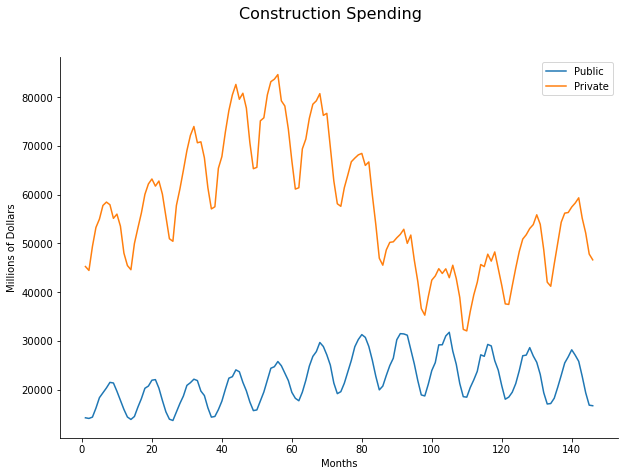

In [4]:
fig,ax = plt.subplots()

ax.plot(df_constr2['Month'],df_constr2['Public Construction'], label='Public')
ax.plot(df_constr2['Month'],df_constr2['Private Construction'], label='Private')
fig.suptitle('Construction Spending', fontsize='16')
ax.set_xlabel('Months')
ax.set_ylabel('Millions of Dollars')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(10,7)
plt.legend(loc="best")

In [5]:
from scipy import stats

PrivSlope, PrivIntercept, Priv_r_value, Priv_p_value, Priv_std_err = stats.linregress(df_constr2.index,df_constr2['Private Construction'])
print('Private Construction:\nPrivate intercept =', PrivIntercept, '    Private slope =', PrivSlope, '   Private p_value = ',Priv_p_value)

PubSlope, PubIntercept, Pub_r_value, Pub_p_value, Pub_std_err = stats.linregress(df_constr2.index,df_constr2['Public Construction'])
print('Public Construction:\nPublic intercept =', PubIntercept, '    Public slope =', PubSlope, '     Public p_value = ',Pub_p_value)


Private Construction:
Private intercept = 66985.60357841766     Private slope = -132.5985944684912    Private p_value =  3.965217656244861e-08
Public Construction:
Public intercept = 18327.939893765724     Public slope = 52.00857586303297      Public p_value =  3.028349007007645e-09


**Note:** For the stats in the cell above, the really small p-value shows that there is statistical significance.

**Note:** Compute squared error relative to the original data series for each month and cumulatively too.

Private Construction Spending Average Squared Error per Month: 
37,395,667.05
Public Construction Spending Average Squared Error per Month: 
13,581,548.10
Private Construction Spending Total Squared Error: 
4,113,523,376.04
Public Construction Spending Total Squared Error: 
1,493,970,291.11


,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPriv,sqErrPriv,MovAvgPub,sqErrPub
2009-02-28 00:00:00,19,Jul-03,"82,971","62,216","20,755","57,969.43","18,033,352.0","18,050.49","7,314,395.4"
2009-03-31 00:00:00,20,Aug-03,"85,191","63,234","21,957","58,314.94","24,197,107.6","18,058.00","15,202,201.0"
2009-04-30 00:00:00,21,Sep-03,"83,841","61,767","22,075","58,718.90","9,290,896.7","18,084.92","15,920,765.0"
2009-05-31 00:00:00,22,Oct-03,"83,133","62,813","20,321","59,143.56","13,464,822.5","18,126.15","4,817,354.3"
2009-06-30 00:00:00,23,Nov-03,"77,915","60,115","17,801","59,593.54","271,918.8","18,170.00","136,161.0"
2009-07-31 00:00:00,24,Dec-03,"71,050","55,584","15,466","60,111.74","20,500,394.3","18,235.50","7,670,130.2"
2009-08-31 00:00:00,25,Jan-04,"64,934","50,975","13,959","60,687.33","94,329,418.8","18,309.17","18,923,950.0"
2009-09-30 00:00:00,26,Feb-04,"64,138","50,449","13,689","61,335.42","118,514,067.8","18,376.96","21,976,953.3"
2009-10-31 00:00:00,27,Mar-04,"73,238","57,796","15,443","62,017.40","17,820,241.4","18,444.61","9,009,669.3"
2009-11-30 00:00:00,28,Apr-04,"78,354","61,177","17,177","62,701.07","2,322,787.7","18,502.00","1,755,625.0"


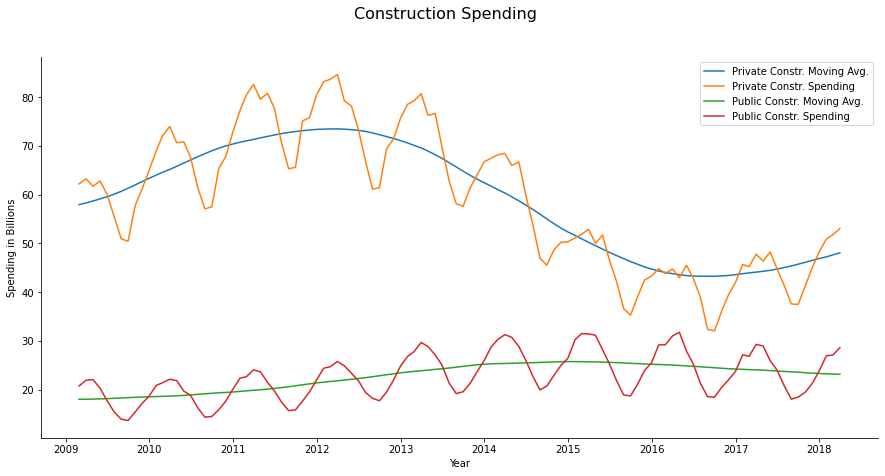

In [6]:
#Compute squared error for Private Constr
    
df_constr2['MovAvgPriv'] = np.NaN
df_constr2['sqErrPriv'] = np.NaN
df_constr2.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2007, month = 8, day = 31), periods = len(df_constr2['Private Construction']))

windowPriv = 36
windowPriv = windowPriv - windowPriv % 2

for i in range(int(windowPriv/2),df_constr2.shape[0]-int(windowPriv/2)):
    df_constr2.loc[df_constr2.index[i],'MovAvgPriv'] = (0.5*df_constr2.iloc[i - int(windowPriv/2)]['Private Construction'] + df_constr2.iloc[i - int(windowPriv/2)+1:i + int(windowPriv/2)]['Private Construction'].sum() + 0.5*df_constr2.iloc[i + int(windowPriv/2)]['Private Construction'])/float(windowPriv)

df_constr2['sqErrPriv'] = (df_constr2['Private Construction'] - df_constr2['MovAvgPriv'])**2

#Compute squared error for Public Constr

df_constr2['MovAvgPub'] = np.NaN 
df_constr2['sqErrPub'] = np.NaN

windowPub = 36
windowPub = windowPub - windowPub % 2

for i in range(int(windowPub/2),df_constr2.shape[0]-int(windowPub/2)):
    df_constr2.loc[df_constr2.index[i],'MovAvgPub'] = (0.5*df_constr2.iloc[i - int(windowPub/2)]['Public Construction'] + df_constr2.iloc[i - int(windowPub/2)+1:i + int(windowPub/2)]['Public Construction'].sum() + 0.5*df_constr2.iloc[i + int(windowPub/2)]['Public Construction'])/float(windowPub)

df_constr2['sqErrPub'] = (df_constr2['Public Construction'] - df_constr2['MovAvgPub'])**2

# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df_constr2.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(df_constr2['MovAvgPriv']/1000,label='Private Constr. Moving Avg.')
ax.plot(df_constr2['Private Construction']/1000,label='Private Constr. Spending')
ax.plot(df_constr2['MovAvgPub']/1000,label='Public Constr. Moving Avg.')
ax.plot(df_constr2['Public Construction']/1000,label='Public Constr. Spending')

df_constr2.style.format({
    'Total Construction': '{:,.0f}'.format,
    'Private Construction': '{:,.0f}'.format,
    'MovAvgPriv': '{:,.2f}'.format,
    'sqErrPriv': '{:,.1f}'.format,
    'Public Construction': '{:,.0f}'.format,
    'MovAvgPub': '{:,.2f}'.format,
    'sqErrPub': '{:,.1f}'.format,
})

ax.set_xlabel('Year')
ax.set_ylabel('Spending in Billions')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15,7)
fig.suptitle('Construction Spending', fontsize='16')
plt.legend(loc="best")

print('Private Construction Spending Average Squared Error per Month: ')
print('{:,.2f}'.format(sum(df_constr2['sqErrPriv'])/len(df_constr2)))
print('Public Construction Spending Average Squared Error per Month: ')
print('{:,.2f}'.format(sum(df_constr2['sqErrPub'])/len(df_constr2)))
print('Private Construction Spending Total Squared Error: ')
print('{:,.2f}'.format(sum(df_constr2['sqErrPriv'])))
print('Public Construction Spending Total Squared Error: ')
print('{:,.2f}'.format(sum(df_constr2['sqErrPub'])))

df_constr2.style.format({
    'Total Construction': '{:,.0f}'.format,
    'Private Construction': '{:,.0f}'.format,
    'MovAvgPriv': '{:,.2f}'.format,
    'sqErrPriv': '{:,.1f}'.format,
    'Public Construction': '{:,.0f}'.format,
    'MovAvgPub': '{:,.2f}'.format,
    'sqErrPub': '{:,.1f}'.format,
})


**Squared error calculated:**
- Private Construction Spending Average Squared Error per Month in Million Dollars: 
 - 37,395,667.05
- Public Construction Spending Average Squared Error per Month in Million Dollars: 
 - 13,581,548.10
- Private Construction Spending Total Squared Error in Million Dollars: 
 - 4,113,523,376.04
- Public Construction Spending Total Squared Error in Million Dollars: 
 - 1,493,970,291.11

The Construction Spending has yet to be explained, $R1$, is computed by subtracting the moving average from the spending time series.  Also, these are included in this code cell:
- Computing:
 - $R1Private$ as a percentage of spending ($R1ErrorPrivate$) for Private Construction Spending and
 - $R1Public$ as a percentage of spending ($R1ErrorPublic$) for Public Construction Spending.
- The df_constr2.style.format command demonstrates how to display pandas DataFrame data in whicever readble format you prefer.

In [7]:
df_constr2['R1Private'] = df_constr2['Private Construction'] - df_constr2['MovAvgPriv']
df_constr2['R1ErrorPrivate'] = abs((df_constr2['Private Construction'] - df_constr2['R1Private'])/df_constr2['Private Construction'])
df_constr2['R1Public'] = df_constr2['Public Construction'] - df_constr2['MovAvgPub']
df_constr2['R1ErrorPublic'] = abs((df_constr2['Public Construction'] - df_constr2['R1Public'])/df_constr2['Public Construction'])

df_constr2.style.format({
    'Total Construction': '{:,.0f}'.format,
    'Private Construction': '{:,.0f}'.format,
    'MovAvgPriv': '{:,.1f}'.format,
    'sqErrPriv': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format,
    'Public Construction': '{:,.0f}'.format,
    'MovAvgPub': '{:,.1f}'.format,
    'sqErrPub': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1ErrorPublic': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPriv,sqErrPriv,MovAvgPub,sqErrPub,R1Private,R1ErrorPrivate,R1Public,R1ErrorPublic
2009-02-28 00:00:00,19,Jul-03,"82,971","62,216","20,755","57,969.4","18,033,352.0","18,050.5","7,314,395.4","4,246.6",0.932,"2,704.5",0.870
2009-03-31 00:00:00,20,Aug-03,"85,191","63,234","21,957","58,314.9","24,197,107.6","18,058.0","15,202,201.0","4,919.1",0.922,"3,899.0",0.822
2009-04-30 00:00:00,21,Sep-03,"83,841","61,767","22,075","58,718.9","9,290,896.7","18,084.9","15,920,765.0","3,048.1",0.951,"3,990.1",0.819
2009-05-31 00:00:00,22,Oct-03,"83,133","62,813","20,321","59,143.6","13,464,822.5","18,126.2","4,817,354.3","3,669.4",0.942,"2,194.8",0.892
2009-06-30 00:00:00,23,Nov-03,"77,915","60,115","17,801","59,593.5","271,918.8","18,170.0","136,161.0",521.5,0.991,-369.0,1.021
2009-07-31 00:00:00,24,Dec-03,"71,050","55,584","15,466","60,111.7","20,500,394.3","18,235.5","7,670,130.2","-4,527.7",1.081,"-2,769.5",1.179
2009-08-31 00:00:00,25,Jan-04,"64,934","50,975","13,959","60,687.3","94,329,418.8","18,309.2","18,923,950.0","-9,712.3",1.191,"-4,350.2",1.312
2009-09-30 00:00:00,26,Feb-04,"64,138","50,449","13,689","61,335.4","118,514,067.8","18,377.0","21,976,953.3","-10,886.4",1.216,"-4,688.0",1.342
2009-10-31 00:00:00,27,Mar-04,"73,238","57,796","15,443","62,017.4","17,820,241.4","18,444.6","9,009,669.3","-4,221.4",1.073,"-3,001.6",1.194
2009-11-30 00:00:00,28,Apr-04,"78,354","61,177","17,177","62,701.1","2,322,787.7","18,502.0","1,755,625.0","-1,524.1",1.025,"-1,325.0",1.077


The cell below helps us visualize the remaining pattern to be decomposed, $R1Private$, and it also computes the average residual spending pattern.

Private Constr. Average Residual:  113.25315656565621
Public Constr. Average Residual:  120.58522727272724


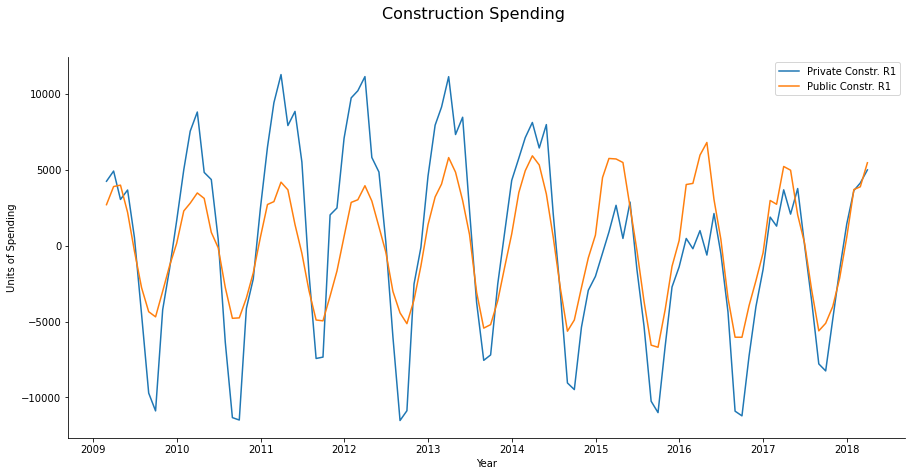

In [8]:
fig,ax = plt.subplots()
ax.plot(df_constr2['R1Private'], label='Private Constr. R1')
ax.plot(df_constr2['R1Public'], label='Public Constr. R1')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")
print('Private Constr. Average Residual: ', sum(df_constr2['R1Private'])/len(df_constr2))
print('Public Constr. Average Residual: ', sum(df_constr2['R1Public'])/len(df_constr2))

Just as seasonal spending had a higher autocorrelation when the data were offet by four periods, we need to use autocorrelation analysis to detect whether any cyclical patterns exist and how many periods before they are repeated.

In [9]:
# Priv Constr. Corr
maxCorrPriv = 0.0
periodPriv = np.NaN
for i in range(1,37):
    corrPriv = df_constr2['R1Private'].autocorr(lag=i)
    print('Private Correlation, lag ',i,'   ',corrPriv)
    if corrPriv > maxCorrPriv:
        maxCorrPriv = corrPriv
        periodPriv = i

#Public Constr. Corr
maxCorrPub = 0.0
periodPub = np.NaN
for i in range(1,37):
    corrPub = df_constr2['R1Public'].autocorr(lag=i)
    print('Public Correlation, lag ',i,'   ',corrPub)
    if corrPub > maxCorrPub:
        maxCorrPub = corrPub
        periodPub = i

print('periodPriv = ',periodPriv,'     Maximum PrivCorrelation = ',maxCorrPriv)
print('periodPub = ',periodPub,'     Maximum Pub Correlation = ',maxCorrPub)

Private Correlation, lag  1     0.8250475036301713
Private Correlation, lag  2     0.4820939752221447
Private Correlation, lag  3     0.0661838628463355
Private Correlation, lag  4     -0.29310582259154694
Private Correlation, lag  5     -0.5386625150984725
Private Correlation, lag  6     -0.6496282831082484
Private Correlation, lag  7     -0.549838477475518
Private Correlation, lag  8     -0.3185413831731613
Private Correlation, lag  9     0.02011606382325631
Private Correlation, lag  10     0.41176952584284515
Private Correlation, lag  11     0.7322731003955263
Private Correlation, lag  12     0.8944851710984221
Private Correlation, lag  13     0.7299213692607464
Private Correlation, lag  14     0.4055214152186815
Private Correlation, lag  15     0.0031237974667481893
Private Correlation, lag  16     -0.34159925855108353
Private Correlation, lag  17     -0.5745510163732713
Private Correlation, lag  18     -0.681216824190257
Private Correlation, lag  19     -0.5902172854543253
Private

The code cell below:
- Breaks the time series into nine components corresonding with each of the nine cycles in the data.  Note that the last cycle is partial.
- Computes an average for each of the 12 points within the cycle over all intances of each point in the data
- Plots the average versus the 9 cycle instances within the data

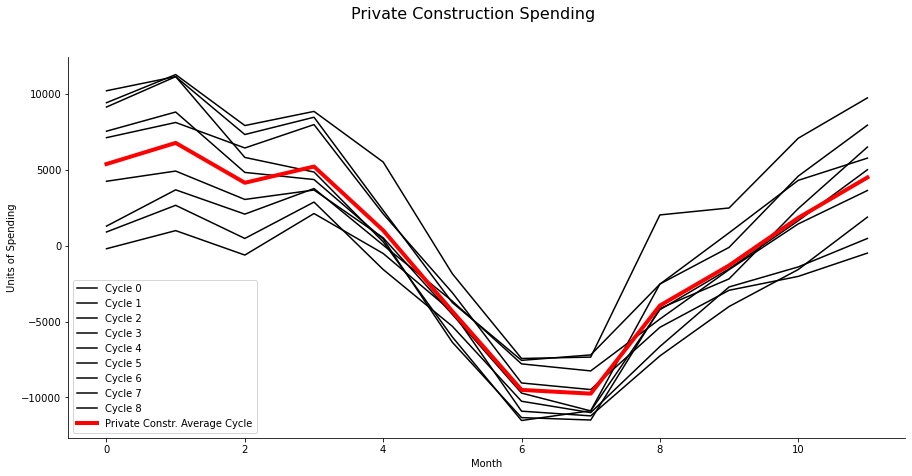

In [10]:
period = 12
cycleLen = period
numCycles = int(len(df_constr2)/cycleLen + 0.5)
cycles = [df_constr2.iloc[range(i*period,min((i+1)*period,len(df_constr2)))]['R1Private'] for i in range(numCycles)]
ptsInCycles = [df_constr2.iloc[range(i,len(df_constr2['R1Private']),period)]['R1Private'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')

ax.plot(avg,label='Private Constr. Average Cycle',c='r', linewidth='4')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

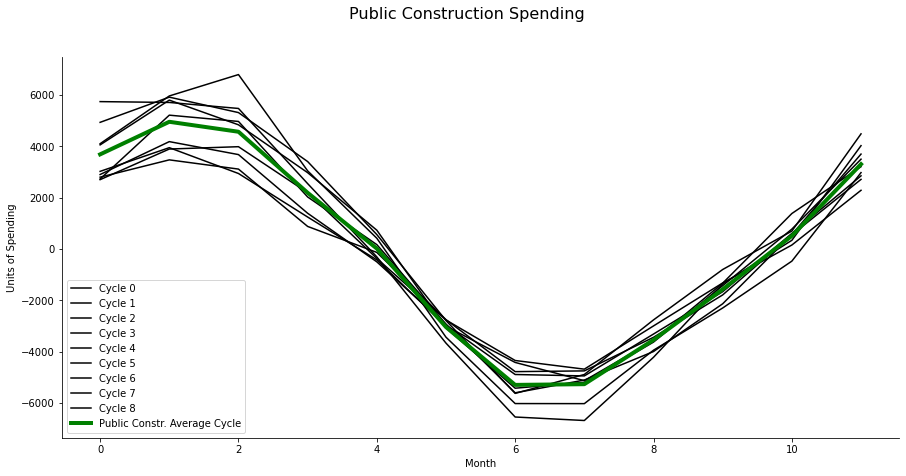

In [11]:
period = 12
cycleLen = period
numCycles = int(len(df_constr2)/cycleLen + 0.5)
cycles = [df_constr2.iloc[range(i*period,min((i+1)*period,len(df_constr2)))]['R1Public'] for i in range(numCycles)]
ptsInCycles = [df_constr2.iloc[range(i,len(df_constr2['R1Public']),period)]['R1Public'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')

ax.plot(avg,label='Public Constr. Average Cycle',c='g', linewidth='4')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

This code cell:
- Inserts the appropriate $CPrivate\left( m \right)$ value into the $CPrivate$ column in the DataFrame for each Month $m$.
- Plots the cyclicality component $CPrivate\left( m \right)$ is plotted with the $R1Private$ column to see how well the cyclicality component and it match.

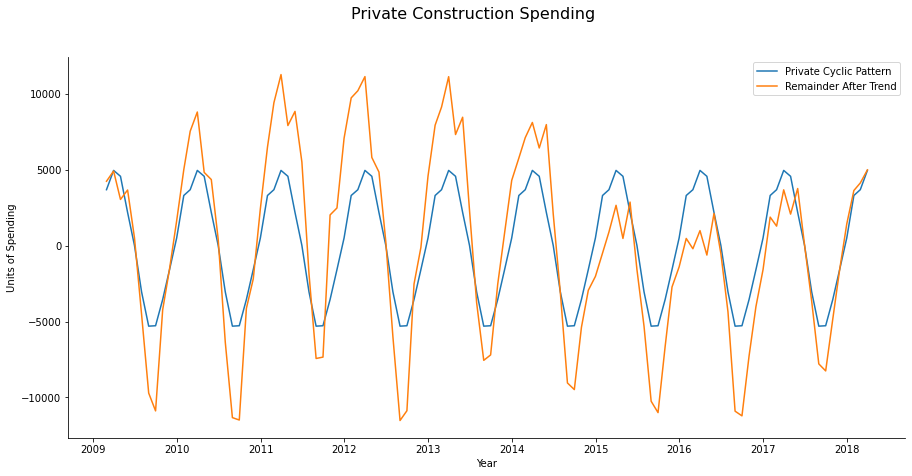

In [12]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_constr2)/cycleLen + 0.5)
df_constr2['CPrivate'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_constr2)):
    df_constr2.loc[df_constr2.index[i], 'CPrivate'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_constr2['CPrivate'],label='Private Cyclic Pattern')
ax.plot(df_constr2['R1Private'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

This code cell:
- Inserts the appropriate $CPublic\left( m \right)$ value into the $CPublic$ column in the DataFrame for each Month $m$.
- Plots the cyclicality component $CPublic\left( m \right)$ is plotted with the $R1Public$ column to see how well the cyclicality component and it match.

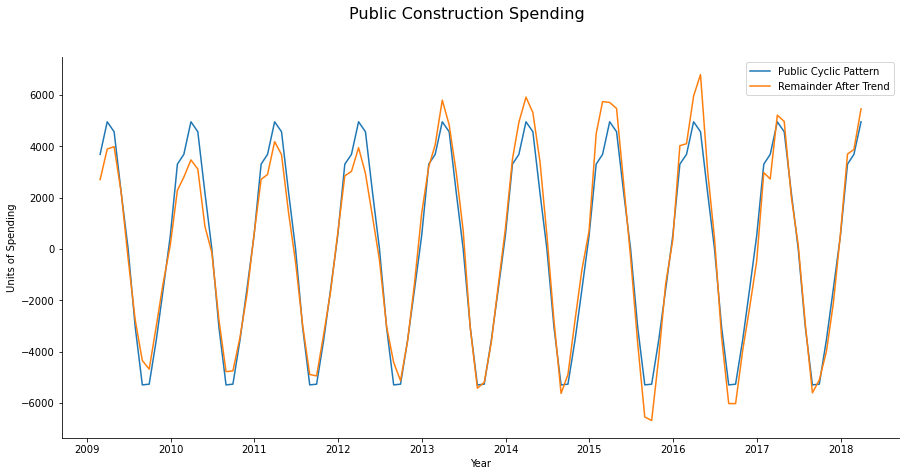

In [13]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_constr2)/cycleLen + 0.5)
df_constr2['CPublic'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_constr2)):
    df_constr2.loc[df_constr2.index[i], 'CPublic'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_constr2['CPublic'],label='Public Cyclic Pattern')
ax.plot(df_constr2['R1Public'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

The code cell below does these for **Private Construction Spending**:

- Computes the remaining residual Private Construction spending to be explained, $R2Private$, after subtracting the cyclical component, $CPrivate \left( m \right)$: this is the $\epsilon Private \left( m \right)$ in our model.
- Computes the error, $R2Private$, as a percentage of the spending time series.
- Computes the mathematical model 'fit', composed of the trend and cyclical components: $TPrivate\left( m \right) + CPrivate\left( m \right)$.
- Plots the fit of the model $TPrivate\left( m \right) + CPrivate\left( m \right)$ with the original data, $HPrivate \left( m \right)$.
- Computes the average absolute error of $R2ErrorPrivate$ of the original spending time series.

Private Constr. Spending Average Error:  0.04920589428135664


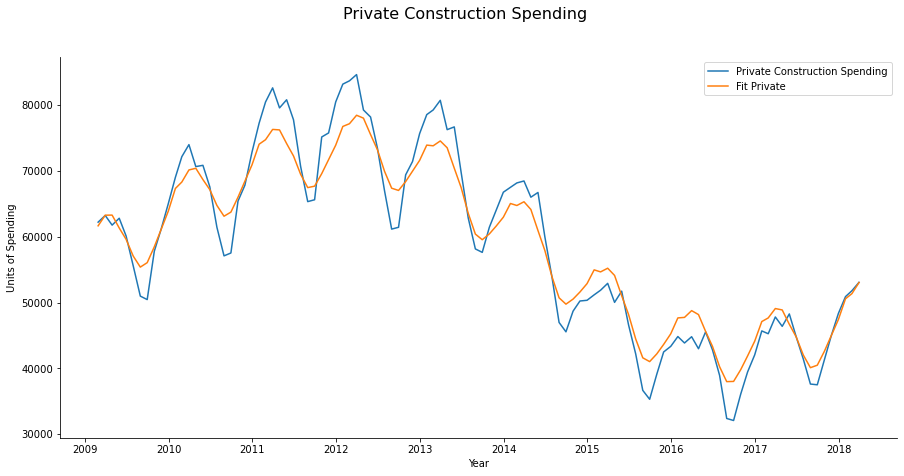

In [14]:
df_constr2['R2Private'] = df_constr2['R1Private'] - df_constr2['CPrivate']
df_constr2['R2ErrorPrivate'] = abs(df_constr2['R2Private']/df_constr2['Private Construction'])
df_constr2['fitPriv'] = df_constr2['MovAvgPriv'] + df_constr2['CPrivate']
#dfHS.drop(['sqErr'],axis=1,inplace=True)
print('Private Constr. Spending Average Error: ', sum(df_constr2['R2ErrorPrivate'])/len(df_constr2))

fig,ax = plt.subplots()
ax.plot(df_constr2['Private Construction'],label='Private Construction Spending')
ax.plot(df_constr2['fitPriv'], label = 'Fit Private')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

The code cell below does these for **Public Construction Spending**:

- Computes the remaining residual Private Construction spending to be explained, $R2Public$, after subtracting the cyclical component, $CPublic \left( m \right)$: this is the $\epsilon Public \left( m \right)$ in our model.
- Computes the error, $R2Public$, as a percentage of the spending time series.
- Computes the mathematical model 'fit', composed of the trend and cyclical components: $TPublic\left( m \right) + CPublic\left( m \right)$.
- Plots the fit of the model $TPublic\left( m \right) + CPublic\left( m \right)$ with the original data, $HPublic \left( m \right)$.
- Computes the average absolute error of $R2ErrorPublic$ of the original spending time series.

Public Constr. Average Error:  0.024999478035219624


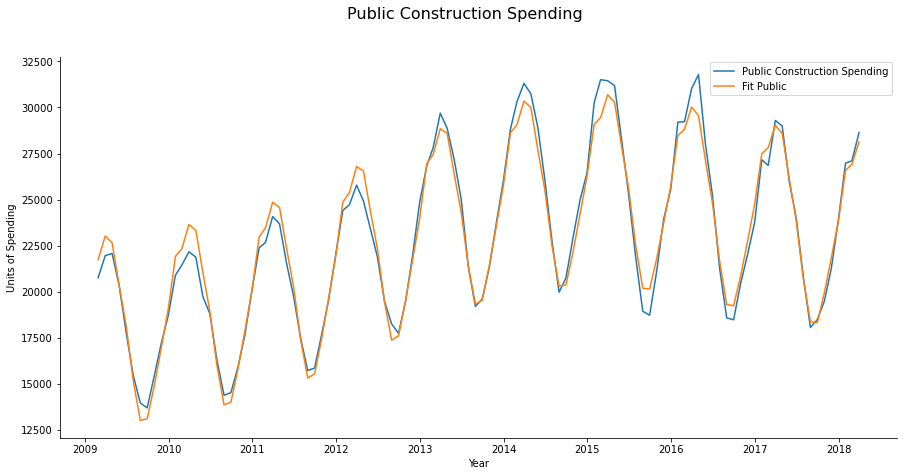

In [15]:
df_constr2['R2Public'] = df_constr2['R1Public'] - df_constr2['CPublic']
df_constr2['R2ErrorPublic'] = abs(df_constr2['R2Public']/df_constr2['Public Construction'])
df_constr2['fitPublic'] = df_constr2['MovAvgPub'] + df_constr2['CPublic']
#dfHS.drop(['sqErr'],axis=1,inplace=True)
print('Public Constr. Average Error: ', sum(df_constr2['R2ErrorPublic'])/len(df_constr2))

fig,ax = plt.subplots()
ax.plot(df_constr2['Public Construction'],label='Public Construction Spending')
ax.plot(df_constr2['fitPublic'], label = 'Fit Public')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

Here is a plot of the residual $R2Private$ for visualization purposes to observe any remaining patterns that we might want to capture, and also an autocorrelation analysis of the residual.

Correlation, lag  1     0.7542218840016782
Correlation, lag  2     0.5138633225759721
Correlation, lag  3     0.287111678757178
Correlation, lag  4     0.16117029640488964
Correlation, lag  5     0.09024129403951986
Correlation, lag  6     -0.031609852934879314
Correlation, lag  7     0.03445822815471397
Correlation, lag  8     0.04608753031686144
Correlation, lag  9     0.11430424357519307
Correlation, lag  10     0.2805234534325567
Correlation, lag  11     0.47347791288290475
Correlation, lag  12     0.6766064935803016
Correlation, lag  13     0.4634508259804708
Correlation, lag  14     0.26479308168246063
Correlation, lag  15     0.06711636847304113
Correlation, lag  16     -0.02992224394635188
Correlation, lag  17     -0.0681055847550707
Correlation, lag  18     -0.16059681276251714
Correlation, lag  19     -0.08341178759160063
Correlation, lag  20     -0.08988099530999183
Correlation, lag  21     -0.03851175151719567
Correlation, lag  22     0.10063666813952933
Correlation, lag  2

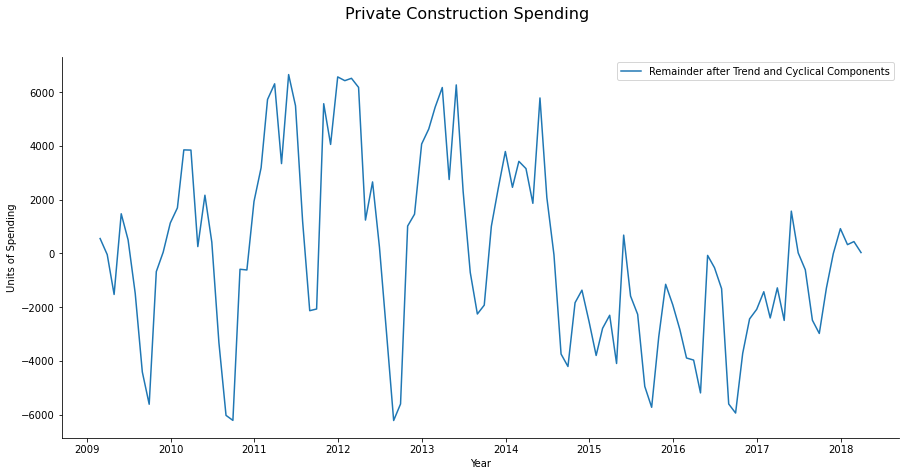

In [16]:
fig,ax = plt.subplots()
ax.plot(df_constr2['R2Private'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_constr2['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Here is a plot of the residual $R2Public$ for visualization purposes to observe any remaining patterns that we might want to capture, and also an autocorrelation analysis of the residual.

Correlation, lag  1     0.7155376451059173
Correlation, lag  2     0.46852253106604014
Correlation, lag  3     0.25515329726845276
Correlation, lag  4     -0.04701265334308256
Correlation, lag  5     -0.22016658790924398
Correlation, lag  6     -0.3132037721816348
Correlation, lag  7     -0.36128568452449933
Correlation, lag  8     -0.24373155996028426
Correlation, lag  9     0.013438618980204611
Correlation, lag  10     0.15965347522586698
Correlation, lag  11     0.38319034802866925
Correlation, lag  12     0.49428131134552267
Correlation, lag  13     0.40155433656190537
Correlation, lag  14     0.4013822541976087
Correlation, lag  15     0.2147075593569968
Correlation, lag  16     0.02213940772746595
Correlation, lag  17     -0.06500065931091231
Correlation, lag  18     -0.17184421045579068
Correlation, lag  19     -0.21271212196110678
Correlation, lag  20     -0.11859857289185519
Correlation, lag  21     -0.05056769990615314
Correlation, lag  22     0.018257128661801573
Correlation

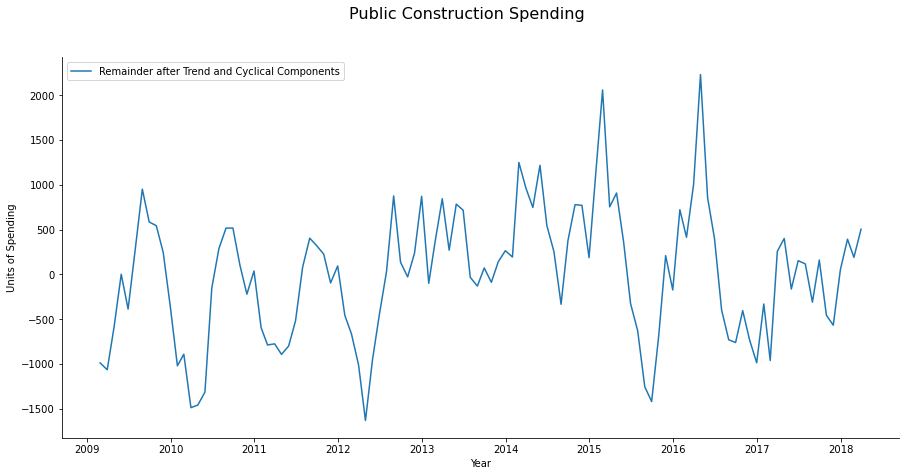

In [17]:
fig,ax = plt.subplots()
ax.plot(df_constr2['R2Public'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_constr2['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

A final graph to show the model versus the original data and, as well, the remander $R2Private$ to judge it relative to the original spending we were trying to fit.

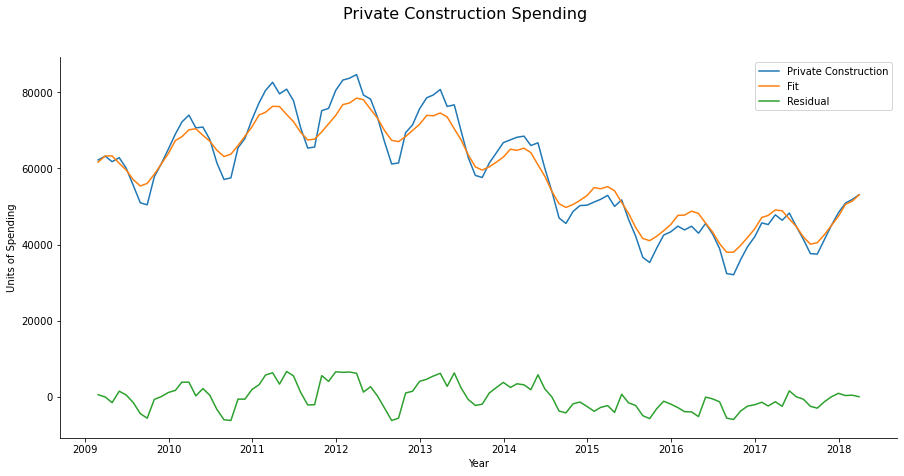

In [18]:
fig,ax = plt.subplots()
ax.plot(df_constr2['Private Construction'],label='Private Construction')
ax.plot(df_constr2['fitPriv'],label='Fit')
ax.plot(df_constr2['R2Private'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Private Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

A final graph to show the model versus the original data and, as well, the remander $R2Public$ to judge it relative to the original spending we were trying to fit.

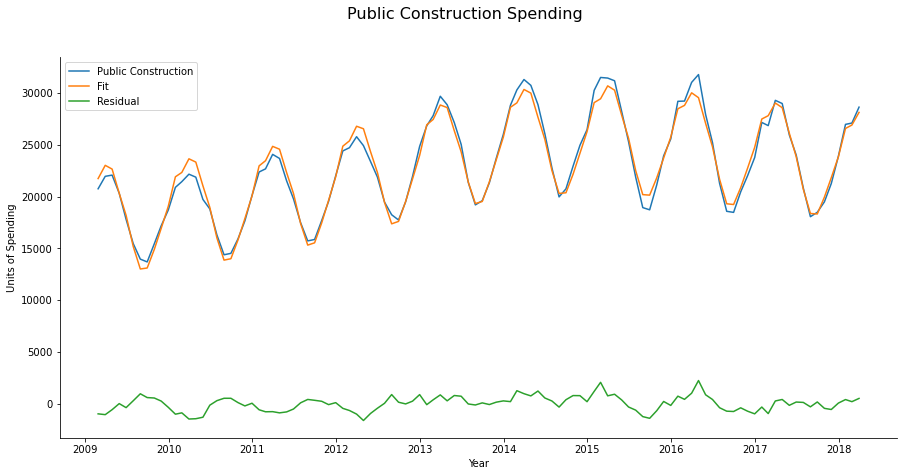

In [19]:
fig,ax = plt.subplots()
ax.plot(df_constr2['Public Construction'],label='Public Construction')
ax.plot(df_constr2['fitPublic'],label='Fit')
ax.plot(df_constr2['R2Public'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Public Construction Spending', fontsize='16')
fig.set_size_inches(15,7)
plt.legend(loc="best")

Trying different factors of cyclicality, it looks as though the simple average is the best value:

In [20]:
df_constrErrors = df_constr2[['Private Construction', 'Public Construction', 'sqErrPriv', 'sqErrPub', 'R2Private', 'R2Public', 'R2ErrorPrivate', 'R2ErrorPublic']]

df_constrErrors.style.format({
    'Total Construction': '{:,.0f}'.format,
    'Private Construction': '{:,.0f}'.format,
    'MovAvgPriv': '{:,.1f}'.format,
    'sqErrPriv': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R2Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format,
    'R2ErrorPrivate': '{:,.3f}'.format,
    'FitPriv': '{:,.3f}'.format,
    'Public Construction': '{:,.0f}'.format,
    'MovAvgPub': '{:,.1f}'.format,
    'sqErrPub': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1ErrorPublic': '{:,.3f}'.format,
    'R2Public': '{:,.1f}'.format,
    'R2ErrorPublic': '{:,.3f}'.format,
    'FitPublic': '{:,.3f}'.format,
    'aCPriv': '{:,.3f}'.format,
    'aCPub': '{:,.3f}'.format,
    'R3Private': '{:,.3f}'.format,
    'R3Public': '{:,.3f}'.format,
    'CPrivate': '{:,.3f}'.format,
    'CPublic': '{:,.3f}'.format
})

,Private Construction,Public Construction,sqErrPriv,sqErrPub,R2Private,R2Public,R2ErrorPrivate,R2ErrorPublic
2009-02-28 00:00:00,"62,216","20,755","18,033,352.0","7,314,395.4",555.8,-986.3,0.009,0.048
2009-03-31 00:00:00,"63,234","21,957","24,197,107.6","15,202,201.0",-42.7,"-1,062.8",0.001,0.048
2009-04-30 00:00:00,"61,767","22,075","9,290,896.7","15,920,765.0","-1,525.1",-583.1,0.025,0.026
2009-05-31 00:00:00,"62,813","20,321","13,464,822.5","4,817,354.3","1,477.4",2.8,0.024,0.000
2009-06-30 00:00:00,"60,115","17,801","271,918.8","136,161.0",505.2,-385.3,0.008,0.022
2009-07-31 00:00:00,"55,584","15,466","20,500,394.3","7,670,130.2","-1,481.5",276.8,0.027,0.018
2009-08-31 00:00:00,"50,975","13,959","94,329,418.8","18,923,950.0","-4,410.1",952.1,0.087,0.068
2009-09-30 00:00:00,"50,449","13,689","118,514,067.8","21,976,953.3","-5,612.2",586.2,0.111,0.043
2009-10-31 00:00:00,"57,796","15,443","17,820,241.4","9,009,669.3",-675.5,544.3,0.012,0.035
2009-11-30 00:00:00,"61,177","17,177","2,322,787.7","1,755,625.0",48.4,247.5,0.001,0.014


**NOTES:**  
The columns depicting time series decomposition analysis errors in $R2Public$, $R2Private$, $R2ErrorPublic$, and $R2ErrorPrivate$ are in the dataframe above. 